## Linear Regression on `adult.csv`

In [1]:
import pandas as pd

df = pd.read_csv('adult.csv')
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [2]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
target            object
dtype: object

### Explore the data

<Axes: >

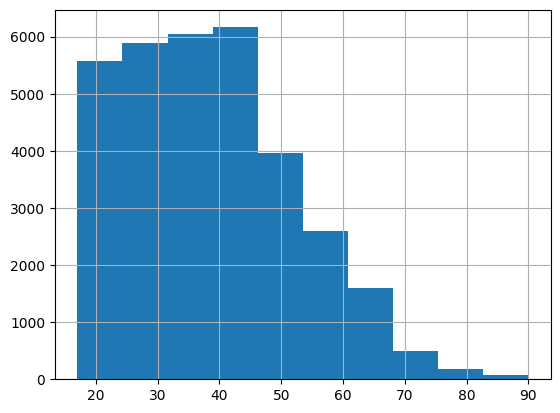

In [3]:
df['age'].hist()

<Axes: xlabel='target'>

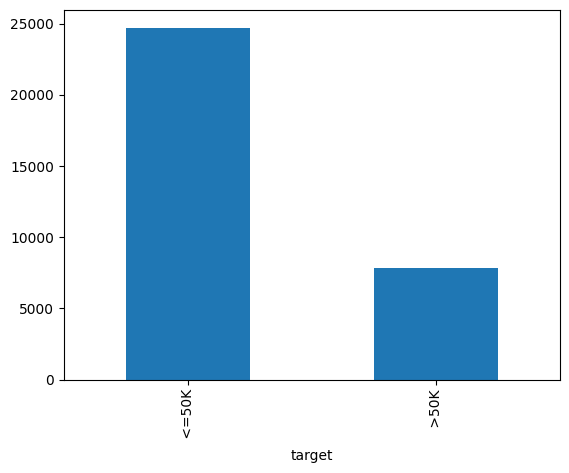

In [4]:
df['target'].value_counts().plot(kind='bar')

<Axes: xlabel='workclass'>

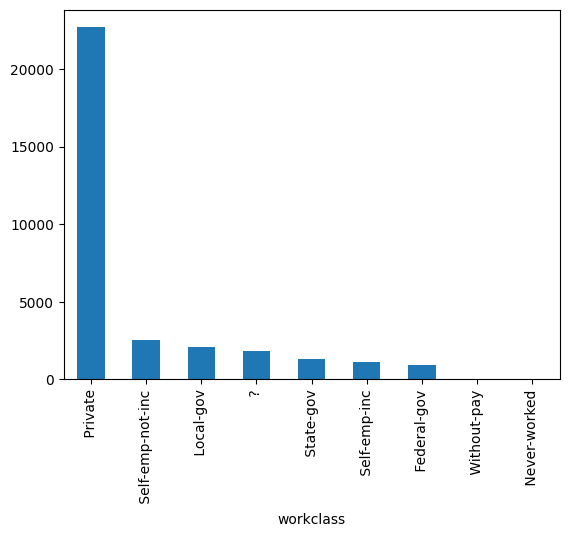

In [5]:
df['workclass'].value_counts().plot(kind='bar')

In [6]:
df['workclass'].unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [7]:
# replace ' ?' with 'Unknown'
df['workclass'] = df['workclass'].replace(' ?', 'Unknown')
df['workclass'].unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', 'Unknown', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

### Splitting features and target label

In [10]:
x = df.drop('target', axis=1)
y = df['target']

print(f"Shape of x = {x.shape} and y = {y.shape}")

Shape of x = (32561, 14) and y = (32561,)


### Splitting training and testing data - 75 % for training 25 % for testing

In [11]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

print(f"x_train: {x_train.shape}")
print(f"x_test: {x_test.shape}")
print(f"y_train: {y_train.shape}")
print(f"y_test: {y_test.shape}")

x_train: (24420, 14)
x_test: (8141, 14)
y_train: (24420,)
y_test: (8141,)


In [14]:
x_train.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
1647,30,Private,39054,HS-grad,9,Married-civ-spouse,Sales,Husband,White,Male,0,0,40,United-States
3440,23,Self-emp-inc,214542,Some-college,10,Never-married,Prof-specialty,Not-in-family,White,Male,0,0,50,United-States
11596,52,Federal-gov,221532,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States
14118,57,Unknown,403625,Some-college,10,Married-civ-spouse,?,Husband,Asian-Pac-Islander,Male,0,0,60,United-States
18198,31,Self-emp-not-inc,117346,Some-college,10,Married-civ-spouse,Sales,Husband,White,Male,0,0,48,United-States


In [15]:
x_test.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
15189,19,Private,146679,Some-college,10,Never-married,Exec-managerial,Own-child,Black,Male,0,0,30,United-States
30910,38,Private,210610,Assoc-acdm,12,Married-civ-spouse,Tech-support,Husband,White,Male,0,0,40,United-States
7063,38,Private,26987,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,0,40,United-States
21447,41,State-gov,48997,HS-grad,9,Married-civ-spouse,Transport-moving,Husband,Black,Male,0,0,40,United-States
15366,31,Private,377850,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,65,United-States


### Standardize the data

In [16]:
# Column Transformation
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

numerical_attributes = x_train.select_dtypes(include=['int64', 'float64']).columns
categorical_attributes = x_train.select_dtypes(include=['object']).columns

ct = ColumnTransformer([
    ('standar_sclaer', StandardScaler(), numerical_attributes),
    ('one_hot_encoder', OneHotEncoder(handle_unknown='ignore'), categorical_attributes)
]).fit(x_train)

transformed_x_train = ct.transform(x_train)
transformed_x_test = ct.transform(x_test)

transformed_x_train, transformed_x_test

(<Compressed Sparse Row sparse matrix of dtype 'float64'
 	with 341880 stored elements and shape (24420, 107)>,
 <Compressed Sparse Row sparse matrix of dtype 'float64'
 	with 113973 stored elements and shape (8141, 107)>)